In [1]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
# import ipywidgets as widgets
from ipywidgets import *
from IPython.display import display
import IPython
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates



import numpy as np

from os.path import exists

from datetime import datetime
# from talib.abstract import *
from math import *
from collections import OrderedDict
# import vectorbt as vbt    
import json
%matplotlib inline
from decimal import *
getcontext().prec = 6
import seaborn as sns

# matplotlib.rcParams.update({'font.size': 5, 'lines.linewidth': 0.5, 'figure.dpi': 300})


In [31]:
np.arange(1,1000)

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [61]:

strategy_params = {
    'tc': {'type': 'int', 'value': 1000, 'step': 5},
    'A': {'type': 'float', 'value': 10, 'step': 1},
    'B': {'type': 'float', 'value': -30, 'step': 1},
    'C': {'type': 'float', 'value': 3, 'step': 0.5},
    'omega': {'type': 'float', 'value': 6, 'step': 1},
    'phi': {'type': 'float', 'value': 50, 'step': 100},
    'm': {'type': 'float', 'value': 0.3, 'step': 0.01},
}
for pk, pv in strategy_params.items():
    pv['wdg'] = globals()[(pv['wdg'] if 'wdg' in pv else pv['type'].capitalize() + 'Text')](
        description=pk,disabled=False,continuous_update=False,
        value=pv['value'], step=pv['step']
    )
strategy_params = {**strategy_params}
wdgts = [pv['wdg'] for pk, pv in strategy_params.items()]

ui = widgets.VBox([widgets.HBox(wdgts[i:i+4]) for i in range(0, len(wdgts), 4)])

def printer(tc, A, B, C, omega, phi, m):
    ix = np.arange(1,1000)
    v = [
        (A + B*abs(tc-t)**m + C*abs(tc-t)**m*cos(omega*log(abs(tc-t))-phi)) 
        for t in ix
        # alpha*(tc-t)**(m-1)*(1 + beta*cos(omega*log(tc-t)-phi)) for t in ix
    ]
    df = pd.DataFrame(v, index=ix)
    fig = plt.figure(figsize=(12,5))
    ax = fig.subplots(1,1)
    df.plot(ax=ax)
                                        

out = widgets.interactive_output(printer, {k : v['wdg'] for k,v in strategy_params.items()})
display(ui, out)

Output()

In [4]:
from lppls import lppls, data_loader
import numpy as np
import pandas as pd
from datetime import datetime as dt
%matplotlib inline

import yfinance as yf

In [24]:
data = yf.download('SPY', start='1993-02-01', end='2024-06-02')
data.to_csv(f'data/SPX.csv')

[*********************100%%**********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,1993-02-01,43.968750,44.250000,43.968750,44.250000,24.939873,480500
1,1993-02-02,44.218750,44.375000,44.125000,44.343750,24.992704,201300
2,1993-02-03,44.406250,44.843750,44.375000,44.812500,25.256897,529400
3,1993-02-04,44.968750,45.093750,44.468750,45.000000,25.362581,531500
4,1993-02-05,44.968750,45.062500,44.718750,44.968750,25.344961,492100
...,...,...,...,...,...,...,...
7634,2023-05-25,414.739990,416.160004,412.410004,414.649994,408.731110,90961600
7635,2023-05-26,415.329987,420.769989,415.250000,420.019989,414.024445,93830000
7636,2023-05-30,422.029999,422.579987,418.739990,420.179993,414.182159,72216000
7637,2023-05-31,418.279999,419.220001,416.220001,417.850006,411.885437,110811800


In [25]:
data = pd.read_csv('data/SPX.csv').set_index('Date', drop=False)
data = data['2016-01-01':]


/home/mu6mula/miniconda3/envs/py310/lib/python3.10/site-packages/lppls/lppls.py:617: RuntimeWarning: invalid value encountered in log
  return (w / (2.0 * np.pi)) * np.log((tc - t1) / (tc - t2))
/home/mu6mula/miniconda3/envs/py310/lib/python3.10/site-packages/lppls/lppls.py:213: RuntimeWarning: invalid value encountered in log
  O = (w / (2.0 * np.pi)) * np.log((tc - first) / (tc - last))


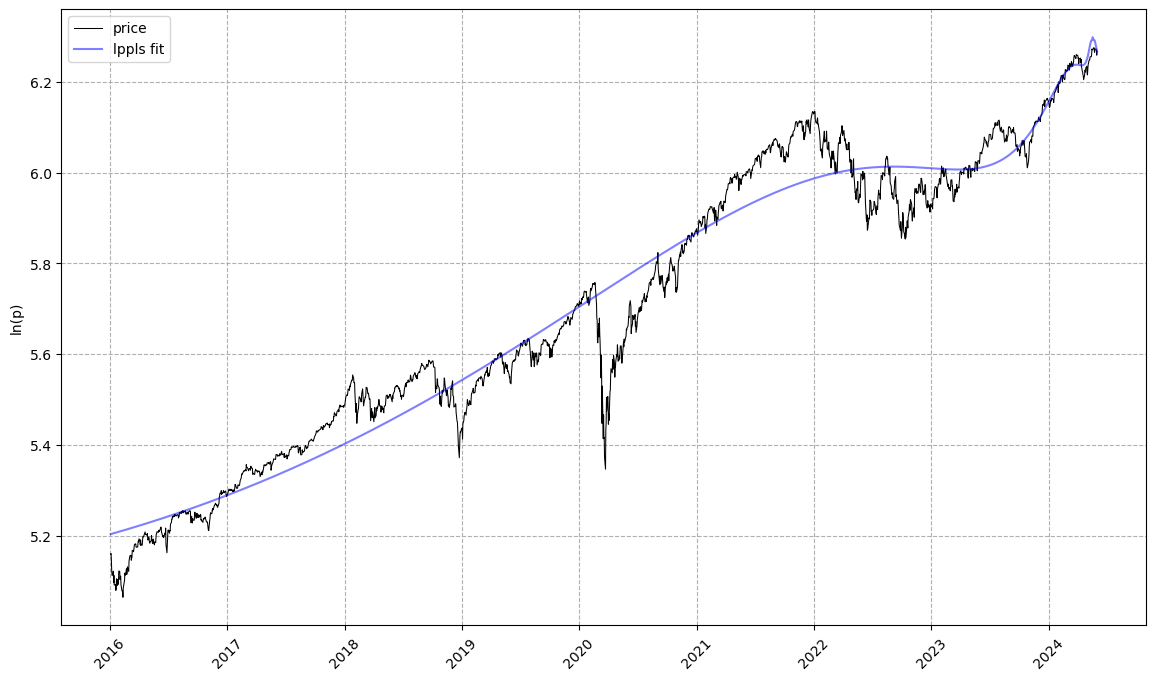

In [26]:

# read example dataset into df 
# data = data_loader.nasdaq_dotcom()
# data = data_loader.

# convert time to ordinal
time = [pd.Timestamp.toordinal(dt.strptime(t1, '%Y-%m-%d')) for t1 in data['Date']]

# create list of observation data
price = np.log(data['Adj Close'].values)

# create observations array (expected format for LPPLS observations)
observations = np.array([time, price])

# set the max number for searches to perform before giving-up
# the literature suggests 25
MAX_SEARCHES = 25

# instantiate a new LPPLS model with the Nasdaq Dot-com bubble dataset
lppls_model = lppls.LPPLS(observations=observations)

# fit the model to the data and get back the params
tc, m, w, a, b, c, c1, c2, O, D = lppls_model.fit(MAX_SEARCHES)

# visualize the fit
lppls_model.plot_fit()


  0%|          | 0/1998 [00:00<?, ?it/s]/home/mu6mula/miniconda3/envs/py310/lib/python3.10/site-packages/lppls/lppls.py:617: RuntimeWarning: invalid value encountered in log
  return (w / (2.0 * np.pi)) * np.log((tc - t1) / (tc - t2))
/home/mu6mula/miniconda3/envs/py310/lib/python3.10/site-packages/lppls/lppls.py:617: RuntimeWarning: invalid value encountered in log
  return (w / (2.0 * np.pi)) * np.log((tc - t1) / (tc - t2))
/home/mu6mula/miniconda3/envs/py310/lib/python3.10/site-packages/lppls/lppls.py:617: RuntimeWarning: invalid value encountered in log
  return (w / (2.0 * np.pi)) * np.log((tc - t1) / (tc - t2))
/home/mu6mula/miniconda3/envs/py310/lib/python3.10/site-packages/lppls/lppls.py:617: RuntimeWarning: invalid value encountered in log
  return (w / (2.0 * np.pi)) * np.log((tc - t1) / (tc - t2))
/home/mu6mula/miniconda3/envs/py310/lib/python3.10/site-packages/lppls/lppls.py:617: RuntimeWarning: invalid value encountered in log
  return (w / (2.0 * np.pi)) * np.log((tc - t1

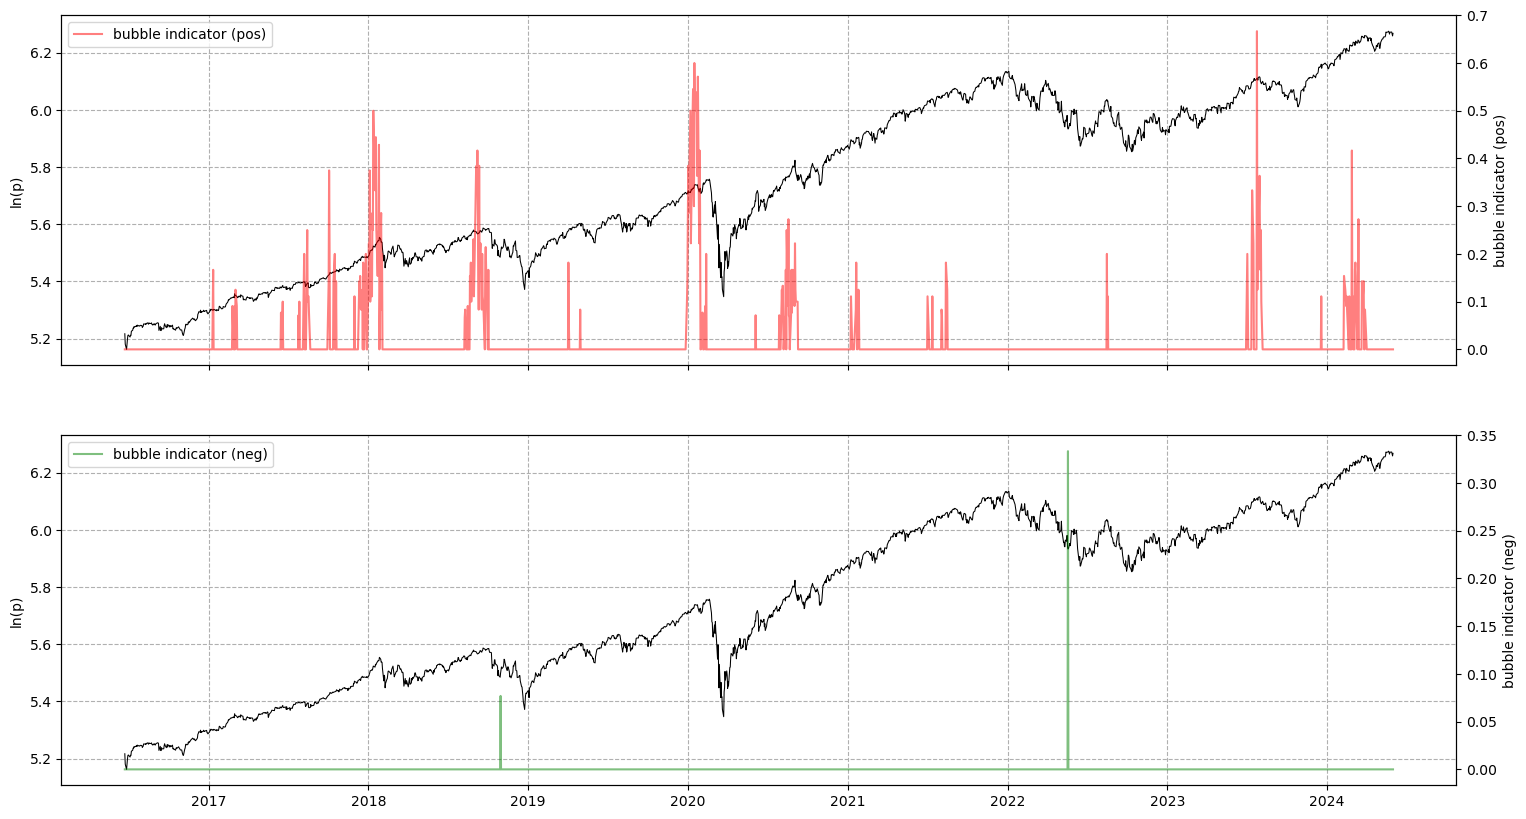

In [27]:
# compute the confidence indicator
res = lppls_model.mp_compute_nested_fits(
    workers=8,
    window_size=120, 
    smallest_window_size=30, 
    outer_increment=1, 
    inner_increment=5, 
    max_searches=25,
    # filter_conditions_config={} # not implemented in 0.6.x
)

lppls_model.plot_confidence_indicators(res)